# Data Preprocessing
To run all the code, you can use the "run all" function. You can also follow along and run the code accordingly. Note that we assume this project to be running with ***Jupyter Notebook***.

### Project setup
The following code cell imports all necessary libraries and sets global configurations for the dataframes.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

data_root = 'dataset'
dataset_name = "churn_data.csv"

### Reading in data


In [2]:
data_path = os.path.join(data_root, dataset_name)
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

### Data Cleaning and Preparations
We begin by conducting some preliminary exploration of our data to gain insight into it.

Let's begin by examining the information of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the output, it is evident that there are no null values in any of the columns. However, as a precautionary measure, we will also review the unique values in each column.

In [4]:
for column in df.columns:
    print(column, df[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Based on the output above, it appears that there are no missing values. However, there are a few issues that need to be addressed:
1. The column `customerID` does not provide any useful information, so we will remove it. 
2. The column `TotalCharges` has the wrong representation for its value, which should be a numerical value rather rhan a string.
3. The column `SeniorCitizen` has a binary value instead of a string. This could potentially affect future preprocessing. It would be safer to convert and map it to a string with values of 'No' and 'Yes'.
4. The values 'No internet service' and 'No phone service' convey the same meaning as 'No', therefore, creating a separate category for them is unnecessary. We will proceed with data discretization.

Let's address these problems.

First, let's create a duplicate of `df`

In [5]:
# make a copy for df
df_cleaned = df.copy()

We can remove column `customerID` from the dataframe

In [6]:
# remove customerID
df_cleaned.drop(columns=['customerID'], axis=1, inplace=True)

In [7]:
# Sanity check
df_cleaned.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Next, we convert `TotalCharges` to numerical datatype.

In [8]:
# convert TotalCharges to numerical
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

In [9]:
# Sanity check
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Subsequently, we assign the values of "No" and "Yes" to the category of `SeniorCitizen` in order to standardize its representation. This will facilitate data exploration and streamline future processing tasks.

In [10]:
# map SeniorCitizen to "No" and "Yes"
df_cleaned['SeniorCitizen'] = df_cleaned['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [11]:
# sanity check
df_cleaned['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Finally, we transform the repeated values in certain columns to 'No' in order to carry out data discretization.

In [13]:
df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace('No phone service','No')
df_cleaned['OnlineSecurity'] = df_cleaned['OnlineSecurity'].replace('No internet service','No')
df_cleaned['OnlineBackup'] = df_cleaned['OnlineBackup'].replace('No internet service','No')
df_cleaned['DeviceProtection'] = df_cleaned['DeviceProtection'].replace('No internet service','No')
df_cleaned['TechSupport'] = df_cleaned['TechSupport'].replace('No internet service','No')
df_cleaned['StreamingTV'] = df_cleaned['StreamingTV'].replace('No internet service','No')
df_cleaned['StreamingMovies'] = df_cleaned['StreamingMovies'].replace('No internet service','No')

In [14]:
# sanity check
columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns:
    print(column, df_cleaned[column].unique())

MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']


After completing the data cleaning process, it was observed that the column `TotalCharges` now contains some missing values.

In [15]:
df_cleaned.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

According to Loukili, Messaoudi, and El Youbi (2023), it has been determined that the variable `TotalCharges` can be obtained by multiplying the variables `tenure` and `MonthlyCharges`. In cases where the `TotalCharges` column is null, the corresponding `tenure` value is 0, signifying that it is the customer's first month. Therefore, it is appropriate to assign the `MonthlyCharges` value to all the missing values in this scenario.

In [16]:
df_cleaned[df_cleaned['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
# replace null value in TotalCharges with MonthlyCharges
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(df_cleaned['MonthlyCharges'])

df_cleaned.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# sanity check
df_cleaned[df_cleaned['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,20.25,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,25.75,No
1340,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,19.85,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,25.35,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,20.00,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,19.70,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


### Split Data
Split data into training, validation, testing set with ratio 7:1:2

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.125, random_state=42)

print('Training set: ', train.shape)
print('Validation set: ', val.shape)
print('Testing set: ', test.shape)

Training set:  (4929, 20)
Validation set:  (705, 20)
Testing set:  (1409, 20)


### Imbalance data
In this section, we will examine the distribution of the target variable, 'Churn', to determine if there is any imbalance in the data. If imbalance is detected, we will rebalance it using oversampling techniques. This process will be conducted after splitting the dataset to prevent bias in the data.

Firstly, we look into the distribution of `Churn`:

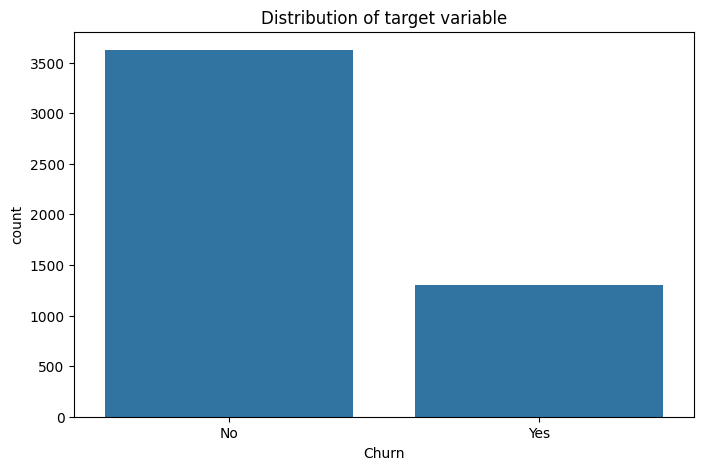

In [20]:
# plot distribution grahp for target variable Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=train)
plt.title('Distribution of target variable')
plt.show()

There is a clear imbalance for our target variable: `Churn`, we will rebalance the data with `SMOTENC` upsampling.

In [21]:
# import smote
from imblearn.over_sampling import SMOTENC

X_train = train.drop("Churn", axis=1)
y_train = train["Churn"]

In [22]:
cat_attributes = X_train.select_dtypes(['object'])
cat_index = []
for i in cat_attributes:
  cat_index.append(X_train.columns.get_loc(i))
display(cat_index)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [23]:
#normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
num_attributes = X_train[['tenure', 'MonthlyCharges', 'TotalCharges']].columns
X_train_scaled[num_attributes] = min_max_scaler.fit_transform(X_train_scaled[num_attributes])
display(X_train_scaled)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5119,Female,No,No,No,0.069444,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,0.571998,0.043925
2170,Female,No,No,No,0.291667,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Electronic check,0.418535,0.143036
5152,Female,No,Yes,Yes,0.763889,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),0.073742,0.157997
5035,Male,No,No,No,0.277778,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,0.603388,0.187226
2710,Female,No,Yes,No,0.333333,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),0.021425,0.053543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Male,Yes,No,No,0.166667,No,No,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,0.253114,0.058637
1409,Female,No,Yes,Yes,0.597222,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.740409,0.463905
6834,Female,No,No,No,0.208333,No,No,DSL,No,Yes,No,No,No,Yes,Two year,Yes,Mailed check,0.204783,0.067413
5685,Male,No,Yes,Yes,0.625000,Yes,No,No,No,No,No,No,No,No,Two year,No,Electronic check,0.009467,0.102112


In [24]:
# use smotenc to oversample
smote_nc = SMOTENC(categorical_features=cat_index, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train_scaled, y_train)

# convert X_resampled and y_resampled to dataframe
X_resampled = pd.DataFrame(X_resampled, columns=X_train_scaled.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['Churn'])

# combine X_resampled and y_resampled
train_resampled = pd.concat([X_resampled, y_resampled], axis=1)

train_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,0.069444,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,0.571998,0.043925,No
1,Female,No,No,No,0.291667,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Electronic check,0.418535,0.143036,No
2,Female,No,Yes,Yes,0.763889,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),0.073742,0.157997,No
3,Male,No,No,No,0.277778,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,0.603388,0.187226,No
4,Female,No,Yes,No,0.333333,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),0.021425,0.053543,No


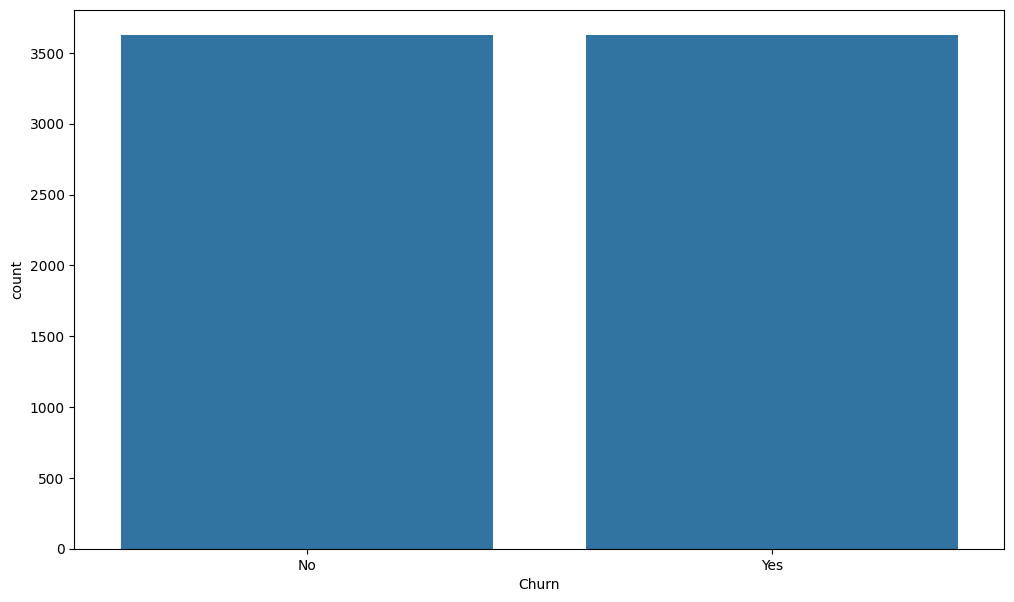

In [25]:
# plot distribution for Churn
plt.figure(figsize=(12, 7))
sns.countplot(x='Churn', data=train_resampled)
plt.show()

The upsampling created around 2000 entries to the dataset.

Perform Normalisation on Validation and Test set for model training purposes

In [26]:
X_val = val.drop("Churn", axis=1)
y_val = val["Churn"]

X_val_scaled = X_val.copy()
num_attributes = X_val[['tenure', 'MonthlyCharges', 'TotalCharges']].columns
X_val_scaled[num_attributes] = min_max_scaler.transform(X_val_scaled[num_attributes])
display(X_val_scaled)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3575,Male,No,No,No,0.819444,No,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.333333,0.344680
4958,Female,No,Yes,No,0.819444,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.762332,0.643763
1447,Male,No,No,Yes,0.055556,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0.623318,0.036193
3334,Female,No,No,No,0.569444,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.877429,0.510576
4041,Male,No,No,No,0.638889,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0.423518,0.331710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Male,No,Yes,Yes,0.583333,No,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),0.267564,0.234278
6976,Female,No,Yes,No,0.861111,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),0.535625,0.492199
1722,Female,No,No,No,0.708333,No,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.380169,0.335760
5467,Female,No,No,No,0.736111,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,One year,No,Mailed check,0.800698,0.610784


In [27]:
X_test = test.drop("Churn", axis=1)
y_test = test["Churn"]

X_test_scaled = X_test.copy()
num_attributes = X_test[['tenure', 'MonthlyCharges', 'TotalCharges']].columns
X_test_scaled[num_attributes] = min_max_scaler.transform(X_test_scaled[num_attributes])
display(X_test_scaled)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,No,Yes,No,0.013889,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.065272,0.000692
2715,Male,No,No,No,0.569444,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.069756,0.112814
3825,Female,No,Yes,Yes,0.722222,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0.010962,0.116882
1807,Female,No,No,No,0.013889,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,0.578974,0.006641
132,Male,No,No,No,0.930556,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),0.321873,0.374025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,No,Yes,No,0.888889,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,0.498754,0.503116
315,Male,No,Yes,Yes,0.708333,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),0.914798,0.654004
2439,Male,No,Yes,Yes,0.236111,Yes,No,No,No,No,No,No,No,No,One year,No,Bank transfer (automatic),0.016442,0.035882
5002,Female,No,Yes,Yes,0.958333,No,No,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),0.256104,0.339407


#### Binary values mapping

We will also map binary categorical values in to 0 and 1 which will make future access more convenient.

In [28]:
def mapToBinary(df):
    df["gender"] = df["gender"].replace({"Female": 0, "Male": 1}).astype(int)
    df["SeniorCitizen"] = df["SeniorCitizen"].replace({"No": 0, "Yes": 1}).astype(int)
    df["Partner"] = df["Partner"].replace({"No": 0, "Yes": 1}).astype(int)
    df["Dependents"] = df["Dependents"].replace({"No": 0, "Yes": 1}).astype(int)
    df["PhoneService"] = df["PhoneService"].replace({"No": 0, "Yes": 1}).astype(int)
    df["MultipleLines"] = df["MultipleLines"].replace({"No": 0, "Yes": 1}).astype(int)
    df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No": 0, "Yes": 1}).astype(int)
    df["OnlineBackup"] = df["OnlineBackup"].replace({"No": 0, "Yes": 1}).astype(int)
    df["DeviceProtection"] = df["DeviceProtection"].replace({"No": 0, "Yes": 1}).astype(int)
    df["TechSupport"] = df["TechSupport"].replace({"No": 0, "Yes": 1}).astype(int)
    df["StreamingTV"] = df["StreamingTV"].replace({"No": 0, "Yes": 1}).astype(int)
    df["StreamingMovies"] = df["StreamingMovies"].replace({"No": 0, "Yes": 1}).astype(int)
    df["PaperlessBilling"] = df["PaperlessBilling"].replace({"No": 0, "Yes": 1}).astype(int)
    return df

In [29]:
pd.set_option('future.no_silent_downcasting', True)

Next we perform one hot encoding on the rebalanced data, and on the validation and test set.

In [30]:
# create a sample dataframe with categorical variables
train_resampled = mapToBinary(train_resampled)
train_resampled["Churn"] = train_resampled["Churn"].replace({"No": 0, "Yes": 1}).astype(int)
train_resampled_cat = train_resampled.select_dtypes(['object'])

one_hot = pd.get_dummies(train_resampled_cat, dtype=int)

# concatenate the one-hot encoding with the original dataframe
train_resampled_encoded = pd.concat([train_resampled, one_hot], axis=1)
train_resampled_encoded = train_resampled_encoded.drop(train_resampled_cat.columns, axis=1)
train_resampled_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.069444,1,0,0,0,0,1,0,0,1,0.571998,0.043925,0,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0.291667,1,0,1,0,1,1,0,0,1,0.418535,0.143036,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,1,0.763889,1,1,0,0,0,0,0,0,1,0.073742,0.157997,0,0,0,1,0,0,1,0,1,0,0
3,1,0,0,0,0.277778,1,0,0,0,0,0,1,0,0,0.603388,0.187226,0,0,1,0,1,0,0,0,0,1,0
4,0,0,1,0,0.333333,1,0,0,0,0,0,0,0,0,0.021425,0.053543,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,1,0,1,1,0.061392,1,0,0,0,0,0,0,0,1,0.519696,0.036183,1,0,1,0,1,0,0,0,0,0,1
7242,1,0,0,0,0.018585,1,0,0,0,0,0,0,0,1,0.272539,0.004968,1,1,0,0,1,0,0,0,0,1,0
7243,1,0,1,1,0.324440,1,0,0,0,0,0,1,1,1,0.802342,0.267269,1,0,1,0,1,0,0,0,0,1,0
7244,0,1,0,0,0.744312,1,1,1,1,0,1,1,1,1,0.911568,0.689392,1,0,1,0,0,1,0,0,1,0,0


In [31]:
# Same process for validation set
X_val_scaled = mapToBinary(X_val_scaled)
y_val = y_val.replace({"No": 0, "Yes": 1}).astype(int)
X_val_cat = X_val_scaled.select_dtypes(['object'])

one_hot = pd.get_dummies(X_val_cat, dtype=int)

X_val_encoded = pd.concat([X_val_scaled, one_hot], axis=1)
X_val_encoded = X_val_encoded.drop(X_val_cat.columns, axis=1)
X_val_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3575,1,0,0,0,0.819444,0,0,0,0,0,1,1,1,1,0.333333,0.344680,1,0,0,1,0,0,0,0,1,0
4958,0,0,1,0,0.819444,1,1,1,1,0,0,1,0,1,0.762332,0.643763,0,1,0,1,0,0,0,0,1,0
1447,1,0,0,1,0.055556,1,1,0,0,0,1,0,0,0,0.623318,0.036193,0,1,0,1,0,0,0,1,0,0
3334,0,0,0,0,0.569444,1,1,0,1,1,0,1,1,1,0.877429,0.510576,0,1,0,1,0,0,0,0,1,0
4041,1,0,0,0,0.638889,0,0,1,0,1,1,1,1,1,0.423518,0.331710,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,1,0,1,1,0.583333,0,0,0,1,1,0,0,1,1,0.267564,0.234278,1,0,0,0,1,0,0,1,0,0
6976,0,0,1,0,0.861111,1,0,1,1,1,0,1,0,1,0.535625,0.492199,1,0,0,0,0,1,0,1,0,0
1722,0,0,0,0,0.708333,0,0,0,1,1,0,1,1,1,0.380169,0.335760,1,0,0,0,1,0,0,1,0,0
5467,0,0,0,0,0.736111,1,1,1,1,1,0,1,0,0,0.800698,0.610784,0,1,0,0,1,0,0,0,0,1


In [32]:
# And test set
X_test_scaled = mapToBinary(X_test_scaled)
y_test = y_test.replace({"No": 0, "Yes": 1}).astype(int)
X_test_cat = X_test_scaled.select_dtypes(['object'])

one_hot = pd.get_dummies(X_test_cat, dtype=int)

# concatenate the one-hot encoding with the original dataframe
X_test_encoded = pd.concat([X_test_scaled, one_hot], axis=1)
X_test_encoded = X_test_encoded.drop(X_test_cat.columns, axis=1)
X_test_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0,0.013889,0,0,0,0,0,0,0,0,1,0.065272,0.000692,1,0,0,1,0,0,0,0,1,0
2715,1,0,0,0,0.569444,1,1,0,0,0,0,0,0,1,0.069756,0.112814,0,0,1,1,0,0,1,0,0,0
3825,0,0,1,1,0.722222,1,0,0,0,0,0,0,0,0,0.010962,0.116882,0,0,1,0,0,1,0,0,0,1
1807,0,0,0,0,0.013889,1,0,0,0,1,0,0,0,0,0.578974,0.006641,0,1,0,1,0,0,0,0,1,0
132,1,0,0,0,0.930556,1,0,0,0,0,1,0,0,0,0.321873,0.374025,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,0.888889,1,0,0,1,1,1,0,1,1,0.498754,0.503116,1,0,0,0,0,1,0,0,0,1
315,1,0,1,1,0.708333,1,1,1,1,0,1,1,1,0,0.914798,0.654004,0,1,0,0,1,0,0,1,0,0
2439,1,0,1,1,0.236111,1,0,0,0,0,0,0,0,0,0.016442,0.035882,0,0,1,0,1,0,1,0,0,0
5002,0,0,1,1,0.958333,0,0,1,0,1,0,0,1,1,0.256104,0.339407,1,0,0,0,0,1,0,1,0,0


In [33]:
val_encoded = pd.concat([X_val_encoded, y_val], axis=1)
val_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
3575,1,0,0,0,0.819444,0,0,0,0,0,1,1,1,1,0.333333,0.344680,1,0,0,1,0,0,0,0,1,0,0
4958,0,0,1,0,0.819444,1,1,1,1,0,0,1,0,1,0.762332,0.643763,0,1,0,1,0,0,0,0,1,0,0
1447,1,0,0,1,0.055556,1,1,0,0,0,1,0,0,0,0.623318,0.036193,0,1,0,1,0,0,0,1,0,0,1
3334,0,0,0,0,0.569444,1,1,0,1,1,0,1,1,1,0.877429,0.510576,0,1,0,1,0,0,0,0,1,0,1
4041,1,0,0,0,0.638889,0,0,1,0,1,1,1,1,1,0.423518,0.331710,1,0,0,0,0,1,1,0,0,0,0


In [34]:
test_encoded = pd.concat([X_test_encoded, y_test], axis=1)
test_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
185,0,0,1,0,0.013889,0,0,0,0,0,0,0,0,1,0.065272,0.000692,1,0,0,1,0,0,0,0,1,0,1
2715,1,0,0,0,0.569444,1,1,0,0,0,0,0,0,1,0.069756,0.112814,0,0,1,1,0,0,1,0,0,0,0
3825,0,0,1,1,0.722222,1,0,0,0,0,0,0,0,0,0.010962,0.116882,0,0,1,0,0,1,0,0,0,1,0
1807,0,0,0,0,0.013889,1,0,0,0,1,0,0,0,0,0.578974,0.006641,0,1,0,1,0,0,0,0,1,0,1
132,1,0,0,0,0.930556,1,0,0,0,0,1,0,0,0,0.321873,0.374025,1,0,0,0,0,1,1,0,0,0,0


In [35]:
# Sanity check
print('Training set: ', train_resampled_encoded.shape)
print('Validation set: ', val_encoded.shape)
print('Testing set: ', test_encoded.shape)

Training set:  (7246, 27)
Validation set:  (705, 27)
Testing set:  (1409, 27)


In [36]:
# export balanced train, val & test to csv
resampled_data_path = os.path.join(data_root, 'train.csv')
val_path = os.path.join(data_root, 'val.csv')
test_path = os.path.join(data_root, 'test.csv')

train_resampled_encoded.to_csv(resampled_data_path, index=False)
val_encoded.to_csv(val_path, index=False)
test_encoded.to_csv(test_path, index=False)